In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
data=pd.read_csv('/Users/angelawu/Documents/Kaggle/Mall_customers.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
data=data.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})

### Data Visualisation

#### Age 

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

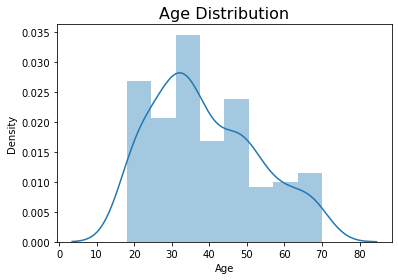

In [28]:
sns.distplot(data['Age'])
plt.title('Age Distribution',fontsize=16)

#### Annual income

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual Income Distribution')

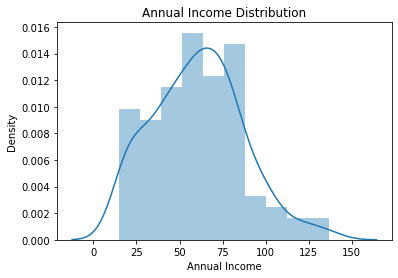

In [29]:
sns.distplot(data['Annual Income'])
plt.title('Annual Income Distribution')

#### Spending score

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Spending Score Distribution')

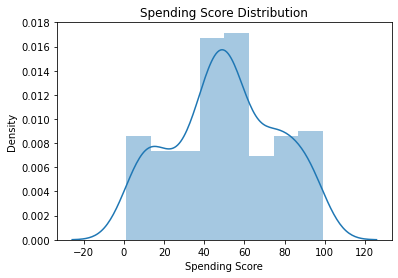

In [30]:
sns.distplot(data['Spending Score'])
plt.title('Spending Score Distribution')

#### Gender

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender')

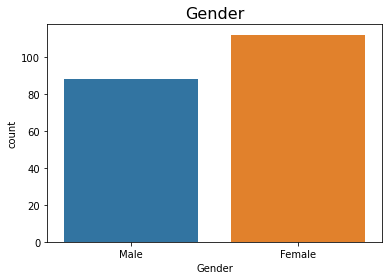

In [31]:
sns.countplot(data['Gender'])
plt.title('Gender',fontsize=16)

In [32]:
# we don't need the customer id to make inferences, so we drop the column customer ID
df=data.drop('CustomerID',axis=1)

#### Correlation between numeric features 

<AxesSubplot:>

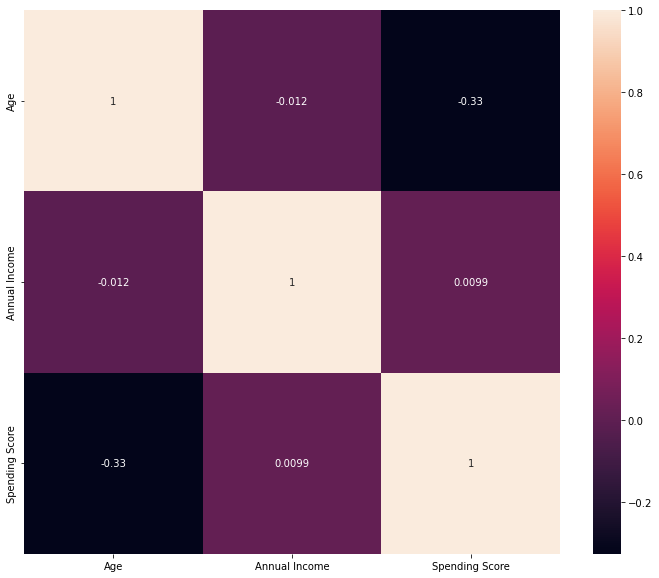

In [33]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

#### Pairplot

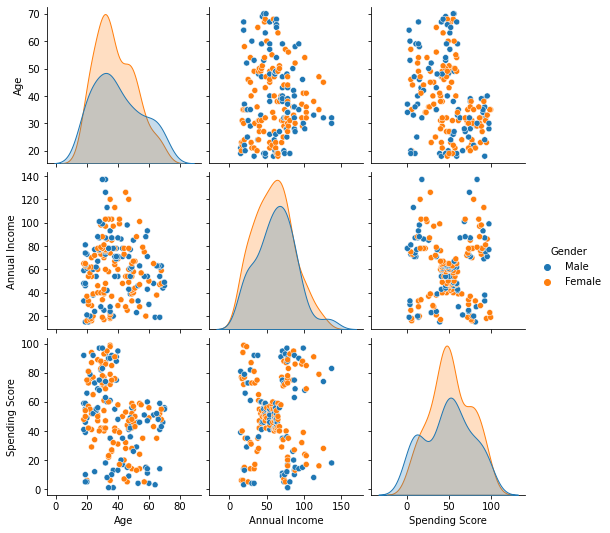

In [36]:
sns.pairplot(df,hue='Gender')

### k-means clustering 

##### normalize the data 

In [46]:
x=df.drop('Gender',axis=1)
scaler=StandardScaler()
x_trans=scaler.fit_transform(x)

##### elbow method 

Text(0, 0.5, 'SSE')

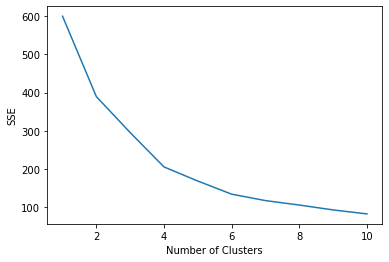

In [53]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(x_trans)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [66]:
kmeans=KMeans(n_clusters=4,random_state=0)
p=kmeans.fit_predict(x_trans)
df['cluster']=p
df.head()

,Gender,Age,Annual Income,Spending Score,cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
